# Emotional Analysis the Deep Approach

**Introduction**

Brain computer interfaces in todays world are seen a was to extend the human experience and interaction with the world by offering a new pathway for information to flow out of the brain onto computing devices thus augmenting the minds physical capabilities. This is mostly motivated by the need to provide independence to the disabled. Researches ahave long been working on both fronts for the past two decades and have made valuable contributions in both the analytical software and the hardware for these systems. Recently new BCI devices have surfaced which try to bring this technology to real world application including the [Emotiv BCI headset](https://www.emotiv.com/the-science/), which offer a inexpensive option for users.

This cheaper hardware now allows for applications that can truelly affect individuals to be developed.

Also as of recent control tasks have become skewed towards self-autonomy it has become apparent that these systems could benefit from training these systems with the human context in mind [1](https://www.aaai.org/ocs/index.php/SSS/SSS14/paper/download/7725/7734). This is important as the autonomy should understand the decision making capabilities and other limitations of the humans in order to proactively provide the most relevant information given the user’s task or mission context. One area of interest for context in intent is the emotional state of the human intent. This 

**EEG Measurements**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
csv_path = "./recording/lucky_happy.csv"

# Step 1: Load the data
def load_neural_data(path=csv_path):
    '''Returns the pandas dataframe'''

    if os.path.exists(csv_path) == True:
        return pd.read_csv(csv_path)

    else:
        print("No file to read from")

emo_df = load_neural_data(csv_path)
emo_df


Y    X    F3    F4    P7   FC6    F7    F8    T7    P8   FC5   AF4  \
0     51  -11 -2707  6932  8014 -7597 -3723    40 -3397 -1262  6568 -3011   
1     51  -11 -2707  6932  8014 -7597 -3723    40 -3397 -1262  6568 -3011   
2   -104  146  5944 -5786  3832  5174 -8017  8052 -4886  2761  7457  6417   
3   -104  146  5944 -5786  3832  5174 -8017  8052 -4886  2761  7457  6417   
4    -69  -20 -6871  4348 -1657 -4805  -648 -2480  4783  4240  7607 -4892   
5    -69  -20 -6871  4348 -1657 -4805  -648 -2480  4783  4240  7607 -4892   
6     24  -80  6360 -6952  1878 -6528 -7983 -2423  1494 -7438  7249 -5561   
7     24  -80  6360 -6952  1878 -6528 -7983 -2423  1494 -7438  7249 -5561   
8    -61  -77  2581  2496  4263  5187  1976  5991  7458 -7962 -3061  2912   
9    -61  -77  2581  2496  4263  5187  1976  5991  7458 -7962 -3061  2912   
10   120   -2 -7660 -6904  2485  2000  1666  3886 -5795   -25  2671  1720   
11   120   -2 -7660 -6904  2485  2000  1666  3886 -5795   -25  2671  1720   
12    75  128   -51 -2476  4282 -4502 -5662   322  -488 -4223 -6853 -3472   
13    75  128   -51 -2476  4282 -4502 -5662   322  -488 -4223 -6853 -3472   
14   144 -101   623  2236  -729  4349 -5828  5434 -2724 -1296   949  3436   
15   144 -101   623  2236  -729  4349 -5828  5434 -2724 -1296   949  3436   
16   129   99  6883  6122  3399  6435  6008 -2325  1766  3779  3568  -589   
17   129   99  6883  6122  3399  6435  6008 -2325  1766  3779  3568  -589   
18   112   97   875 -7969   334  4167  4798  7728  1377  4842  6975 -4115   
19   112   97   875 -7969   334  4167  4798  7728  1377  4842  6975 -4115   
20    52   10  2406  1402  4833 -6555  1573    44  1696  5922  -805 -3756   
21    52   10  2406  1402  4833 -6555  1573    44  1696  5922  -805 -3756   
22    88  126  -545  7942  1926  6267 -6147 -2030 -4358   284  3782  8164   
23    88  126  -545  7942  1926  6267 -6147 -2030 -4358   284  3782  8164   
24   111  -75 -3269 -4636 -3122  5707 -3547 -6962 -7834  5741 -2045    71   
25   111  -75 -3269 -4636 -3122  5707 -3547 -6962 -7834  5741 -2045    71   
26   142  -32   212 -1170  6546 -1801 -4785 -4273 -4461 -3985  -940 -4662   
27    22  139   807 -3302  6976 -5809 -2122  1066 -3605 -4180 -2714  2867   
28    22  139   807 -3302  6976 -5809 -2122  1066 -3605 -4180 -2714  2867   
29   -45  -82  -451 -2791  7879  7105  6906 -1244 -4456  2955 -2780 -2885   
..   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
386   32   49 -7251 -6588 -5024  1181 -7280  1514   -57  5291 -1439 -4633   
387   97  148  2478  6390   988  4106 -4048  -368 -6437 -6122  2256 -7251   
388   97  148  2478  6390   988  4106 -4048  -368 -6437 -6122  2256 -7251   
389   55  -92 -3527  8133  7361  1421 -5887 -1948  3813  4505  7879 -1022   
390   55  -92 -3527  8133  7361  1421 -5887 -1948  3813  4505  7879 -1022   
391  103  -48 -8017  2321 -6796 -6288 -4536   222  8141  7965 -5224 -6058   
392  103  -48 -8017  2321 -6796 -6288 -4536   222  8141  7965 -5224 -6058   
393   93  131  3816 -2691  1760   623  1752  8176 -7017  3284 -7578  7834   
394   93  131  3816 -2691  1760   623  1752  8176 -7017  3284 -7578  7834   
395  122  -91 -5039 -2522  3173 -6860  -777 -8052  3972 -3370  3237 -6954   
396  122  -91 -5039 -2522  3173 -6860  -777 -8052  3972 -3370  3237 -6954   
397  149  145 -4703 -1015   -73  2156 -1682 -3710  5635 -5914   687  7528   
398  149  145 -4703 -1015   -73  2156 -1682 -3710  5635 -5914   687  7528   
399   -7  -23     5  3616  -759  5710  2016  -247  5319  3347 -1460  -145   
400   -7  -23     5  3616  -759  5710  2016  -247  5319  3347 -1460  -145   
401  -20   -1 -2216  5224 -2691 -6848 -1444  1619 -2403 -5291 -4288  5136   
402  -20   -1 -2216  5224 -2691 -6848 -1444  1619 -2403 -5291 -4288  5136   
403 -103  -82 -6960  8138  6338 -3195  6166  6785 -5571  6437 -7070  -668   
404 -103  -82 -6960  8138  6338 -3195  6166  6785 -5571  6437 -7070  -668   
405  -57  141 -3794  -771  4788 -2277 -4066 -3479  6885 -6668  -139 -6085   
406

0      Neutral
1      Neutral
2      Neutral
3      Neutral
4      Neutral
5      Neutral
6      Neutral
7      Neutral
8      Neutral
9      Neutral
10     Neutral
11     Neutral
12     Neutral
13     Neutral
14     Neutral
15     Neutral
16     Neutral
17     Neutral
18     Neutral
19     Neutral
20     Neutral
21     Neutral
22     Neutral
23     Neutral
24     Neutral
25     Neutral
26     Neutral
27      scared
28      scared
29      scared
        ...   
386     scared
387     scared
388     scared
389     scared
390     scared
391     scared
392     scared
393     scared
394     scared
395     scared
396     scared
397     scared
398     scared
399     scared
400     scared
401     scared
402     scared
403     scared
404     scared
405     scared
406     scared
407     scared
408     scared
409     scared
410     scared
411     scared
412     scared
413     scared
414     scared
415     scared
Name: state, dtype: object
416
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

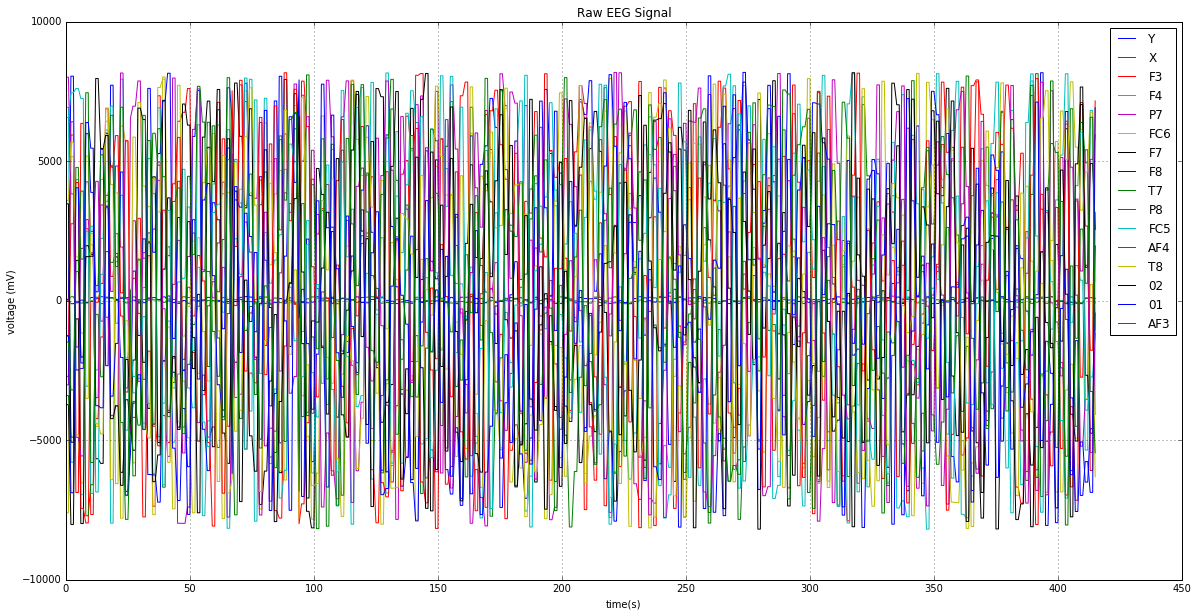

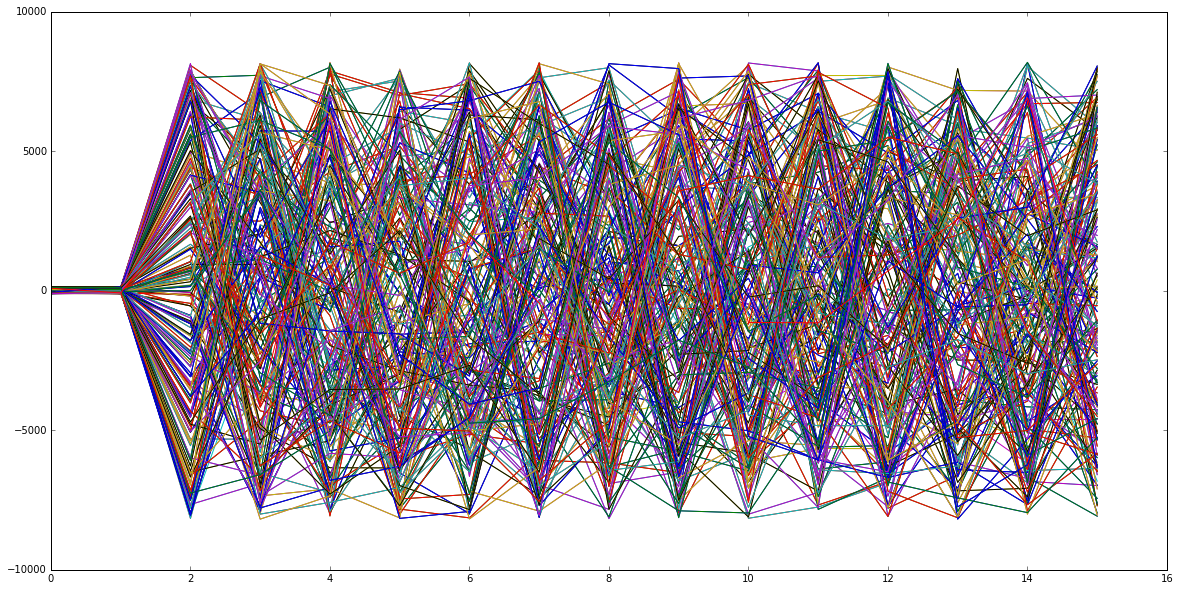

In [2]:
instances = emo_df.shape[0]

# set the sensor values
x = emo_df.ix[:,:-1].values
y = emo_df['state']
print y
size = y.shape[0]
print size

# encode the text labels to allow for math opeartions
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


#reshape the class size for tensor operations
#y = y.reshape(size, 1)
print y
# align each sensor per row
x = x.T
labels = list(emo_df)
print labels
# extract the table labels
print x.shape
t = np.arange(0.0, instances, 1)
#t = np.arange(0.0, instances, 1)
fig, ax = plt.subplots(figsize=(20,10))
for i in x:
    ax.plot(i)
    ax.hold('on')
    
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(x)

ax.set(xlabel='time(s)', ylabel='voltage (mV)',
       title='Raw EEG Signal')

ax.legend(labels[:-1])

ax.grid()

plt.show()

**Preprocessing**

EEg signals carry with them noise signals. these noise signals are from things like power line  inteferences or other electronic amplifiers (external interferences) and also artifacts (signals originating from anyhere other than the cerebral region of the brain) like Ocular EoG, Muscular EMG and Vascular ECG. These artifacts are the results of muscles reactions in the body like eye blinkin, the movement of the head, shoulders legs and fingers. all these contibute to the unwanted signals in the EEG channels. Artifacts liike eye movements and jaw clenching can be removed using cross-hair fixation point [(2)](Thaler, L., Schütz, A., Goodale, M. and Gegenfurtner, K. 2013 What is the best fixation target? The effect of target shape on stability of fixational eye movements. Vision Research, 76, pp.31-42.). Which maitains the concentration and gaze of the particpant during recordings.

In [3]:
cA = []
cD = []
ts_rec = []
import pywt
for i in x:
    ca, cd = pywt.dwt(i, 'db4')
    cA.append(ca); cD.append(cd)

cat = pywt.thresholding.soft(cA, np.std(cA)/2)
cdt = pywt.thresholding.soft(cD, np.std(cD)/2)

for i, j in zip(cat, cdt):
    ts = pywt.idwt(i, j, 'db4')
    ts_rec.append(ts)

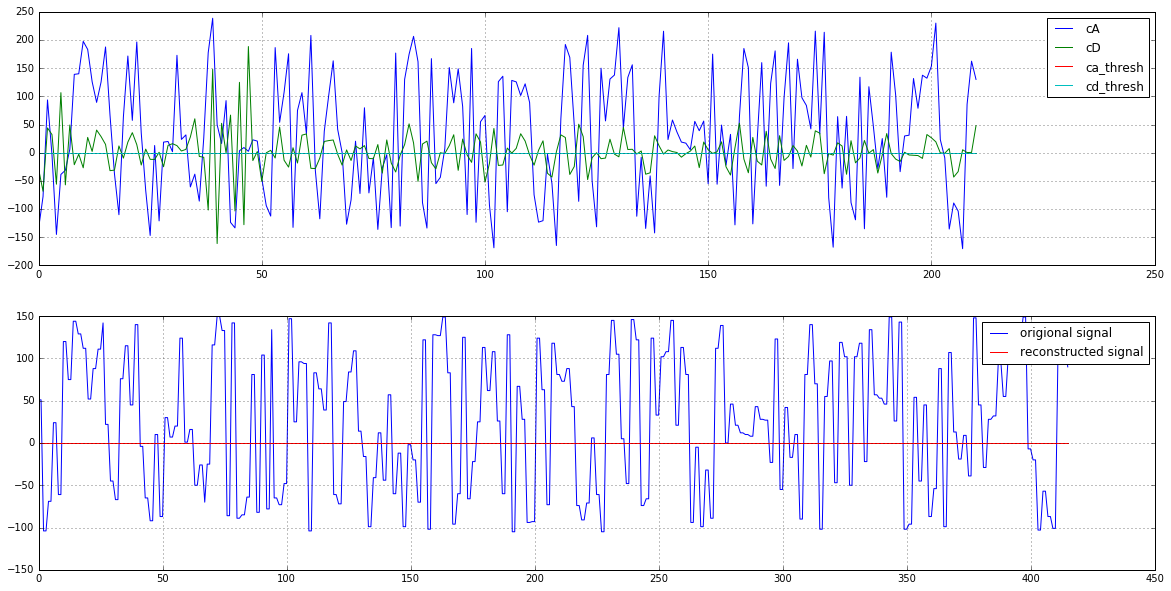

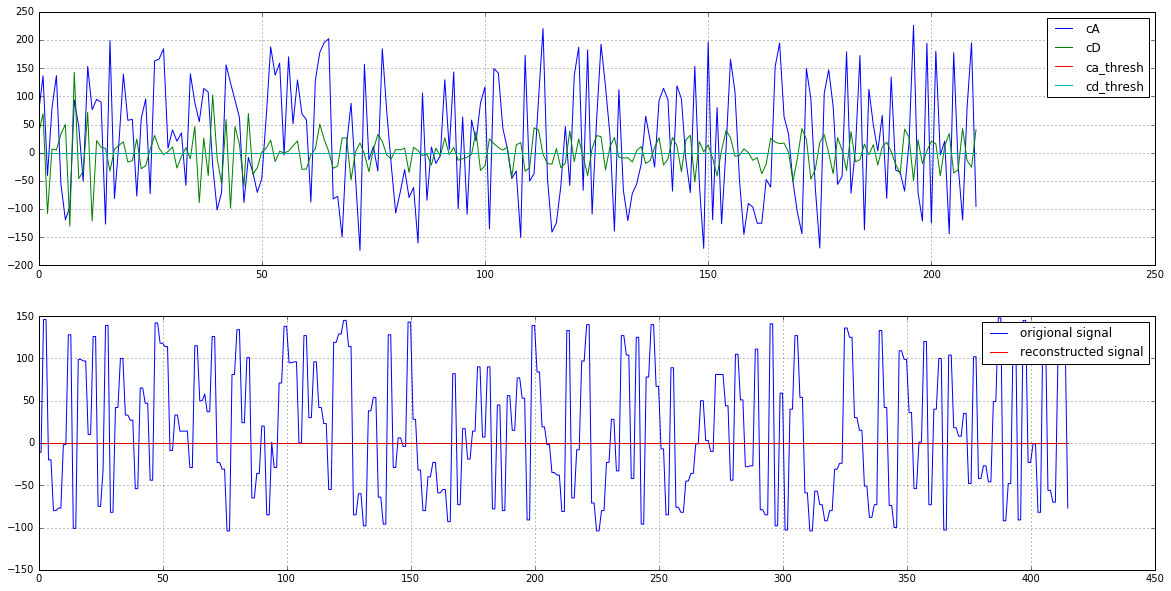

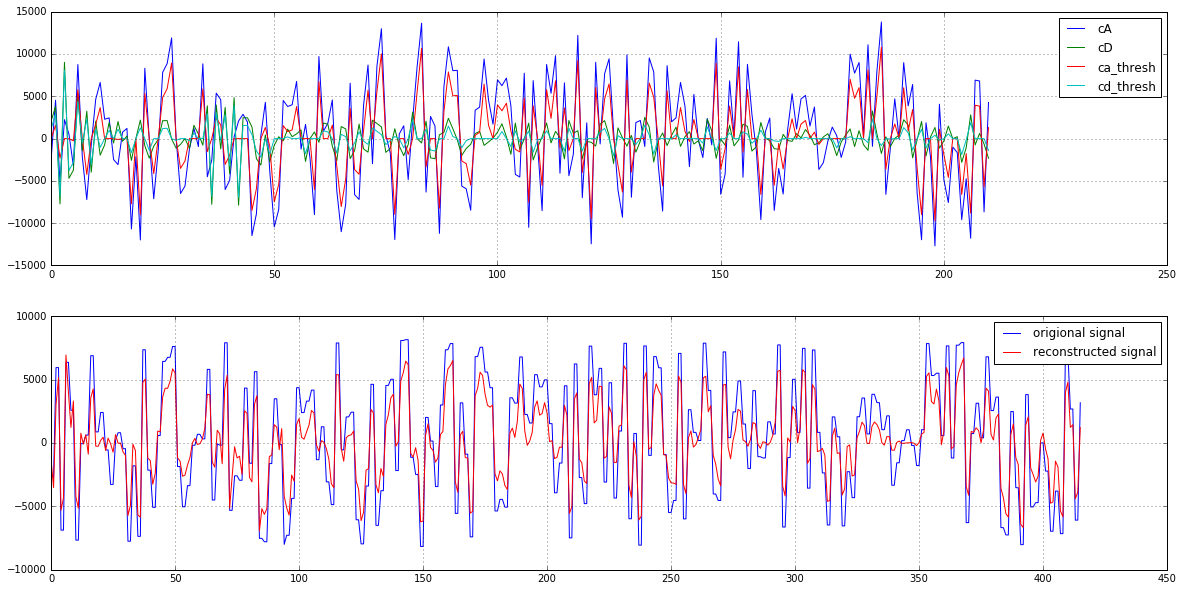

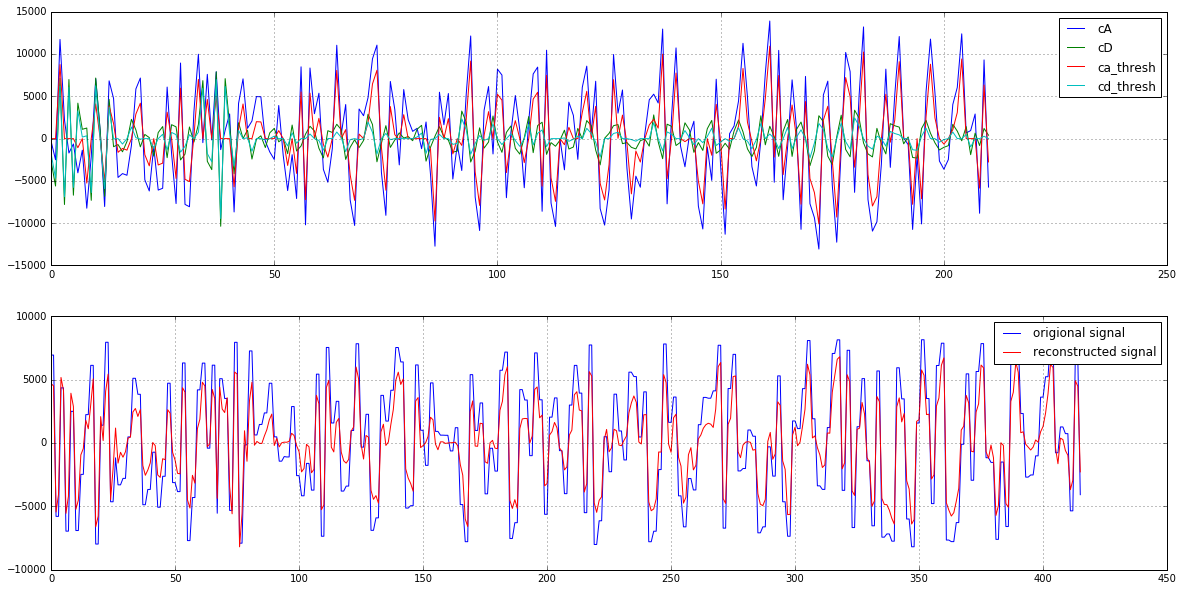

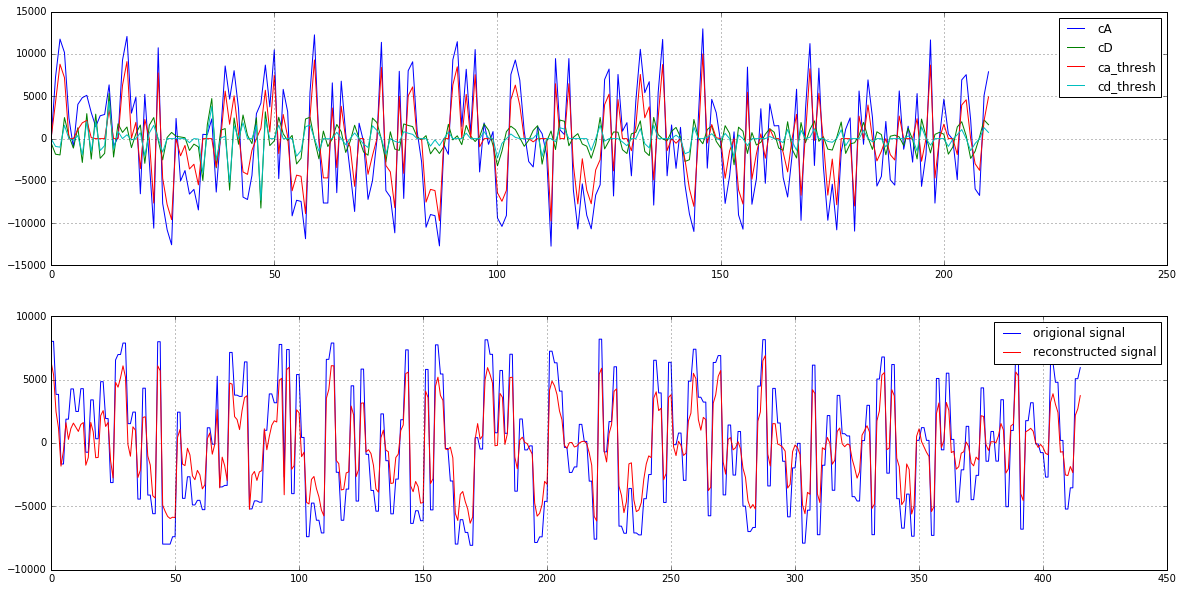

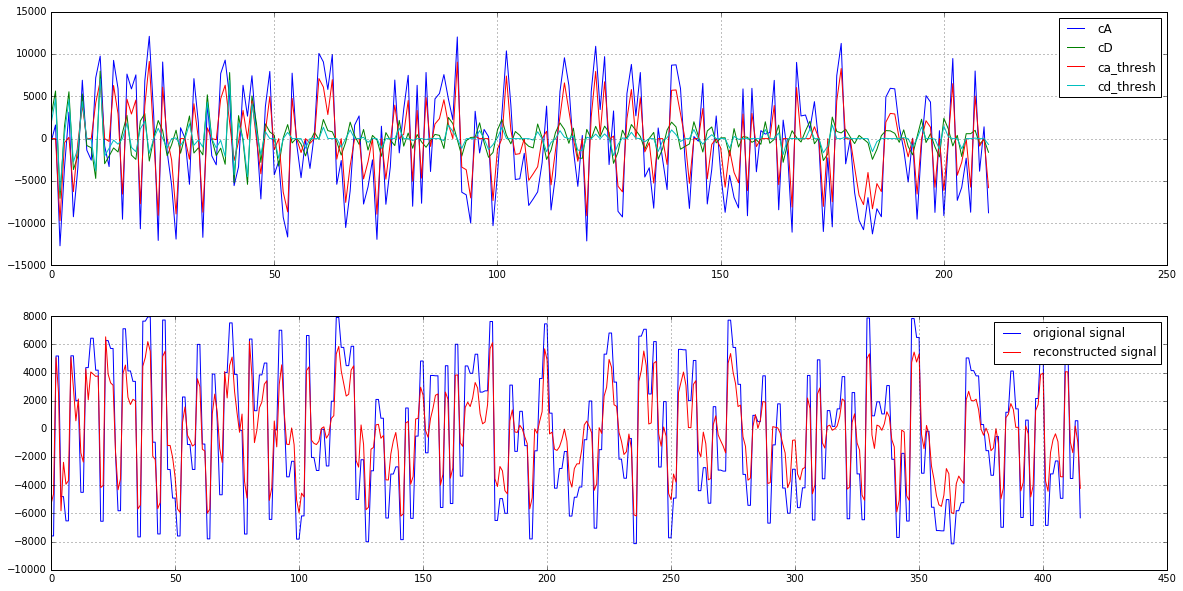

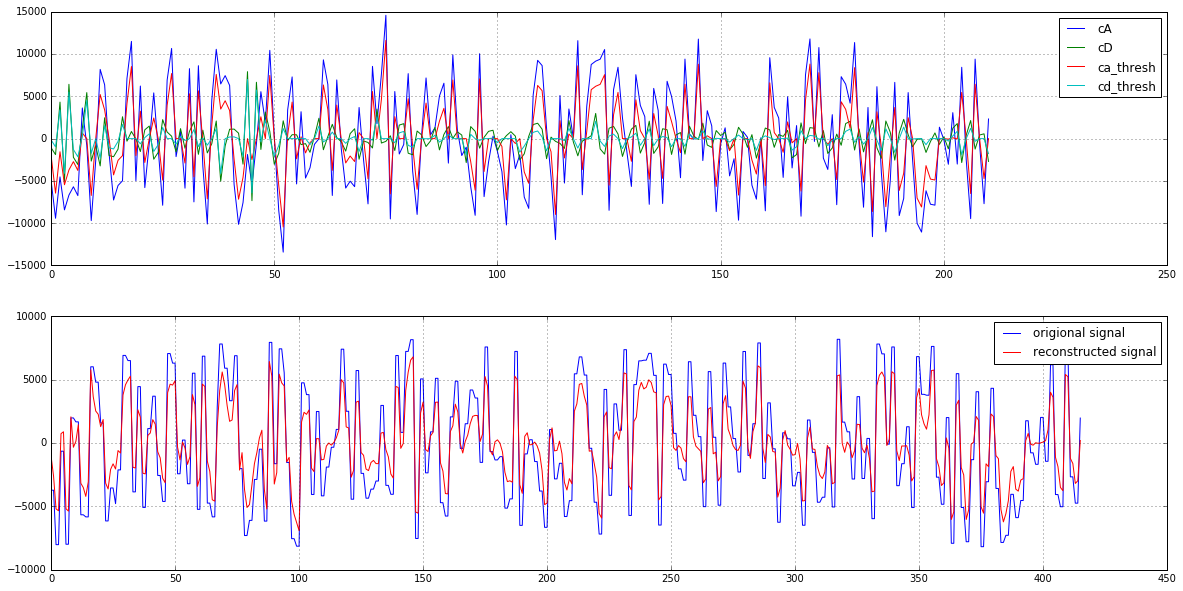

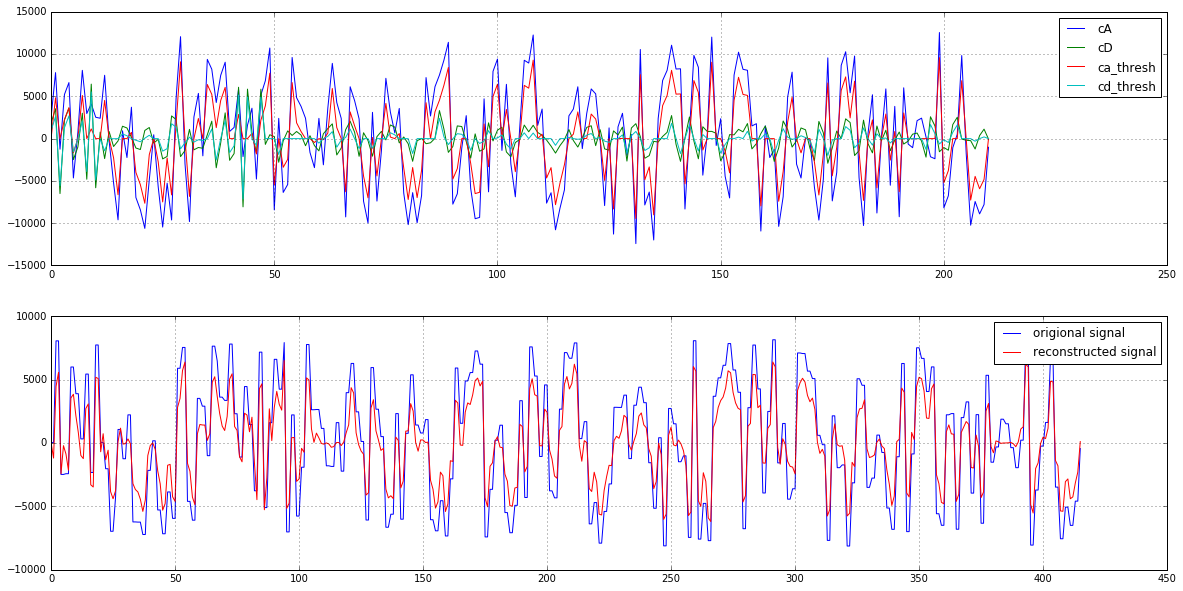

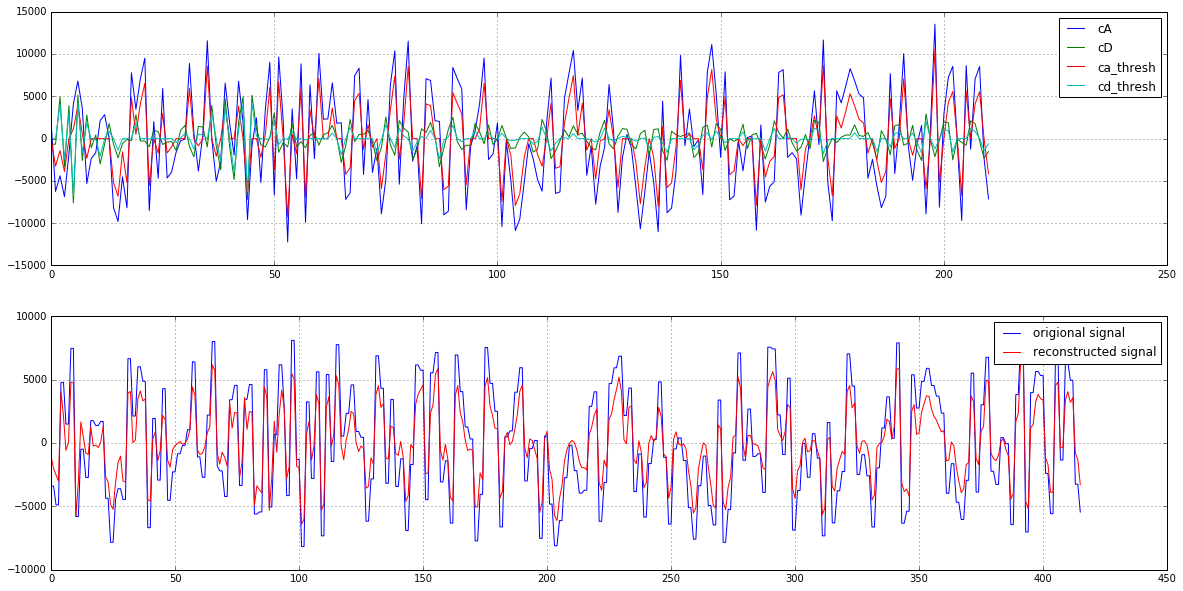

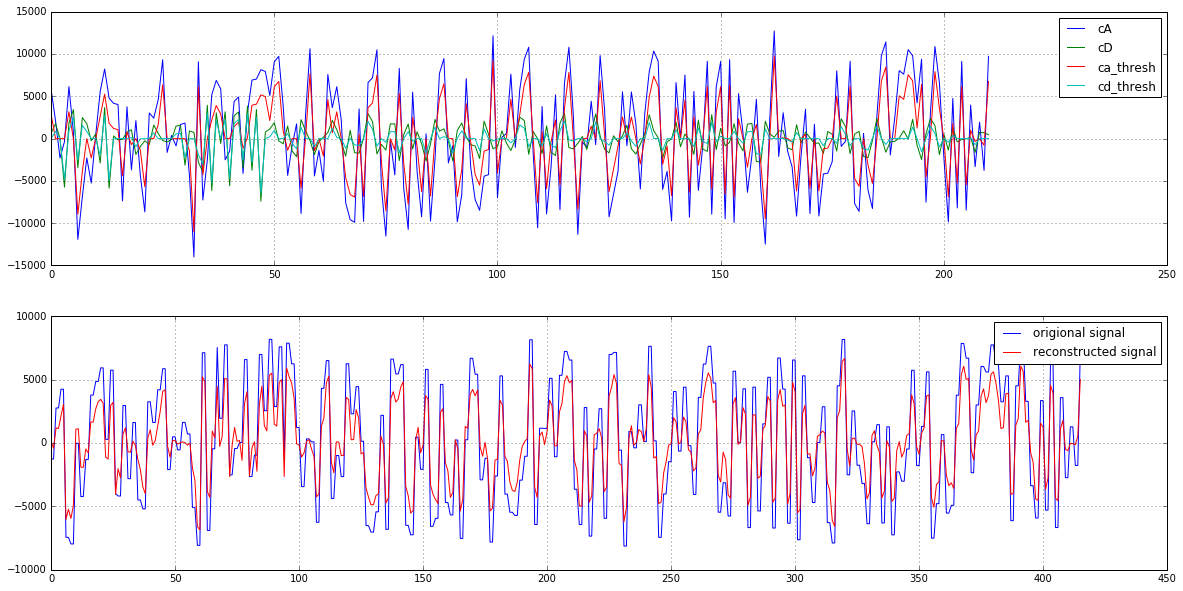

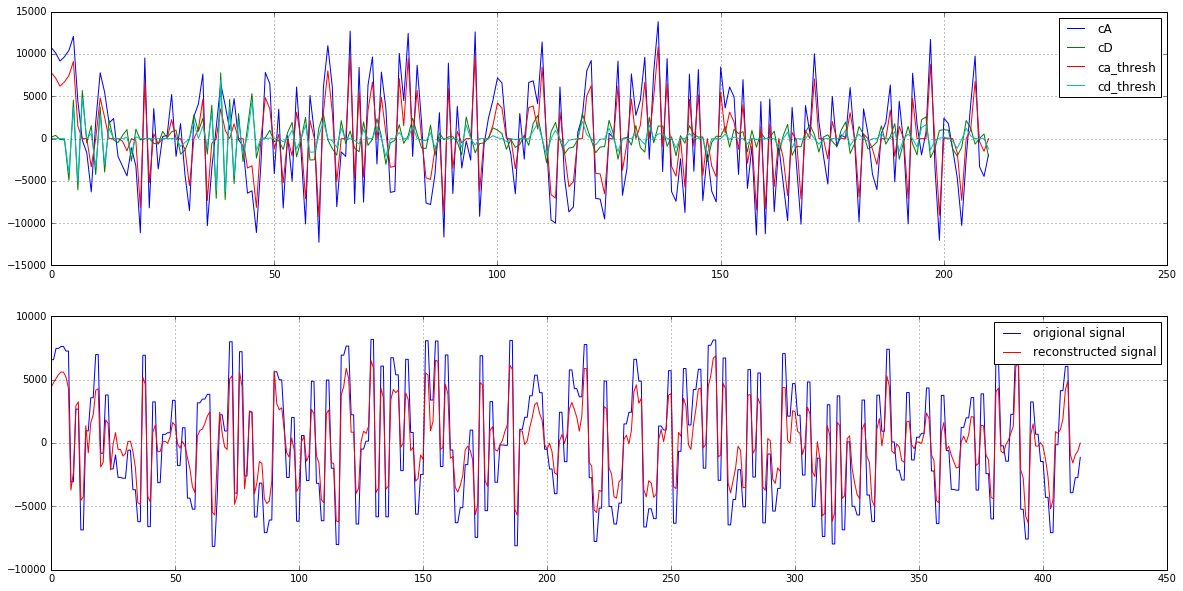

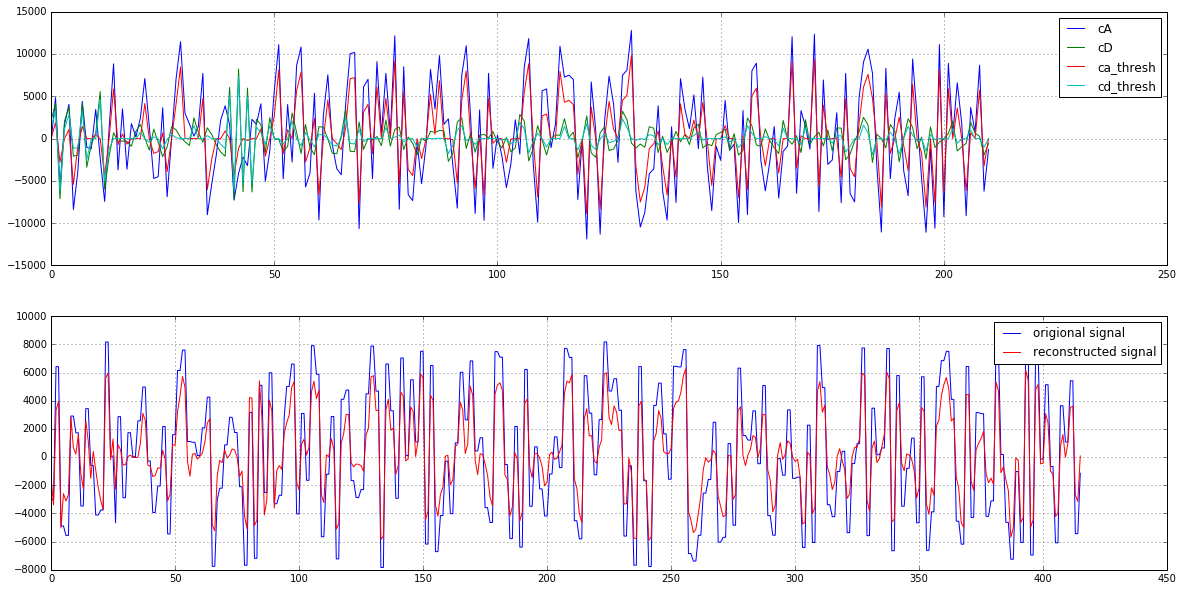

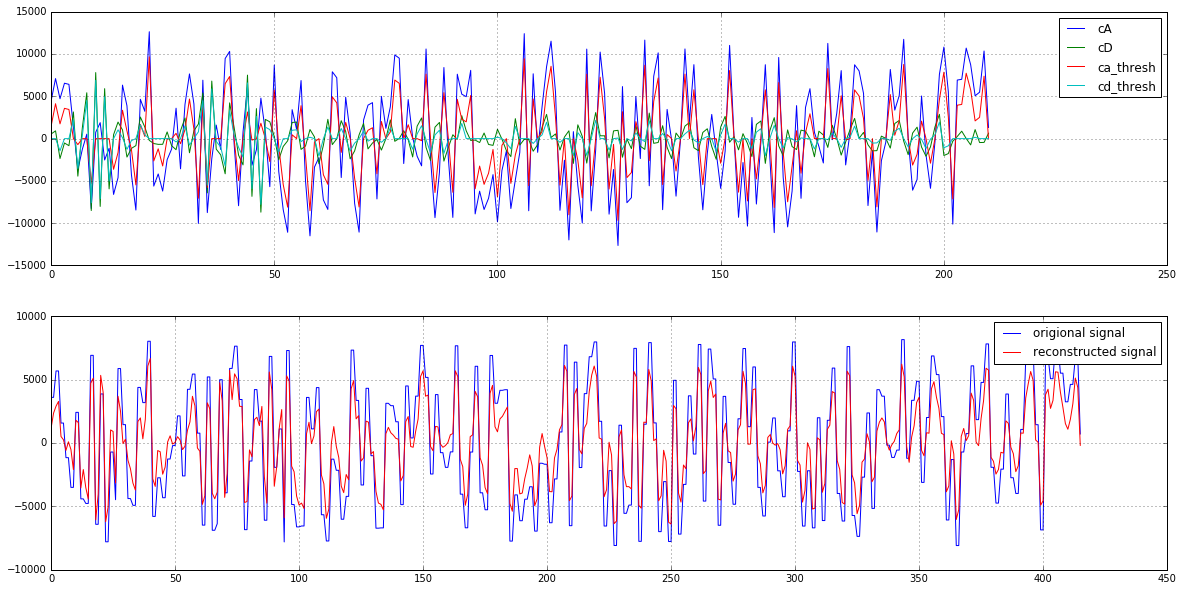

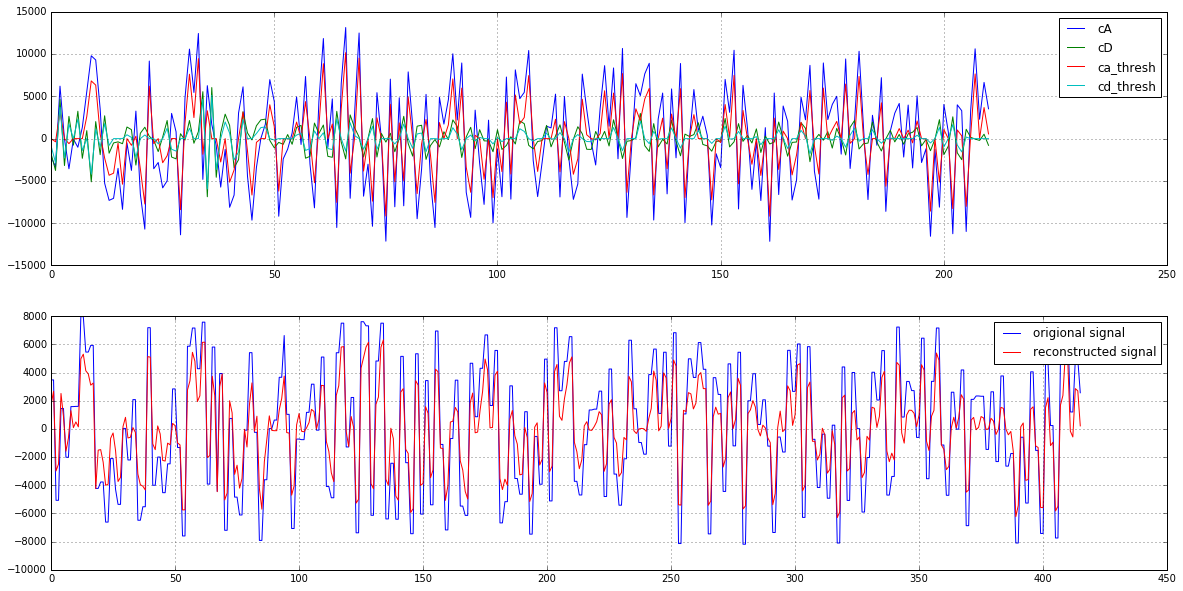

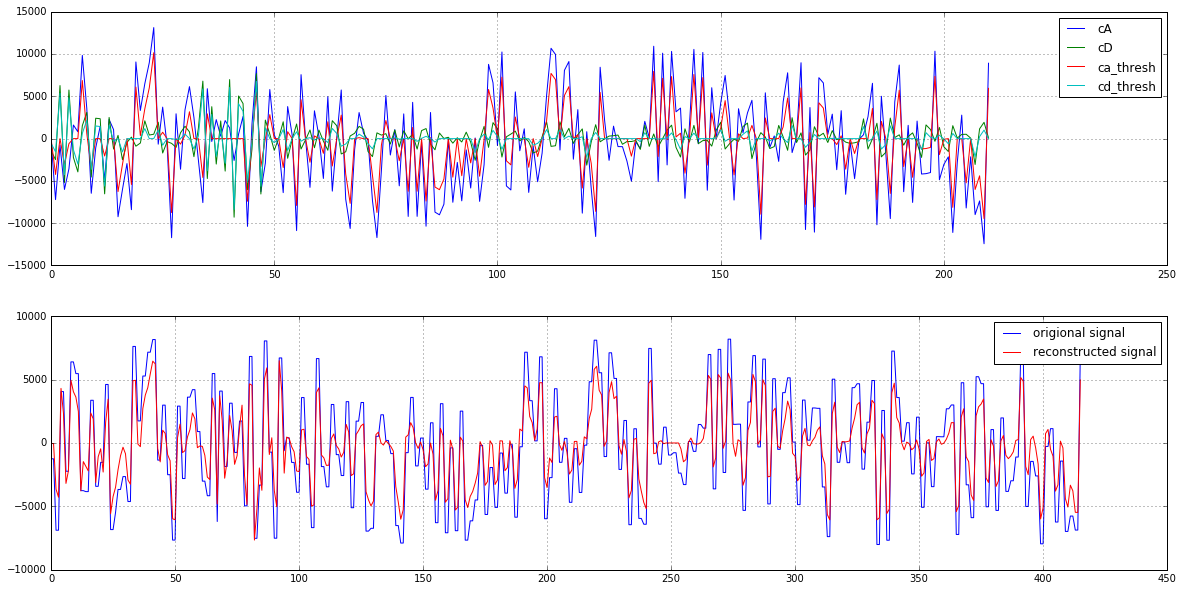

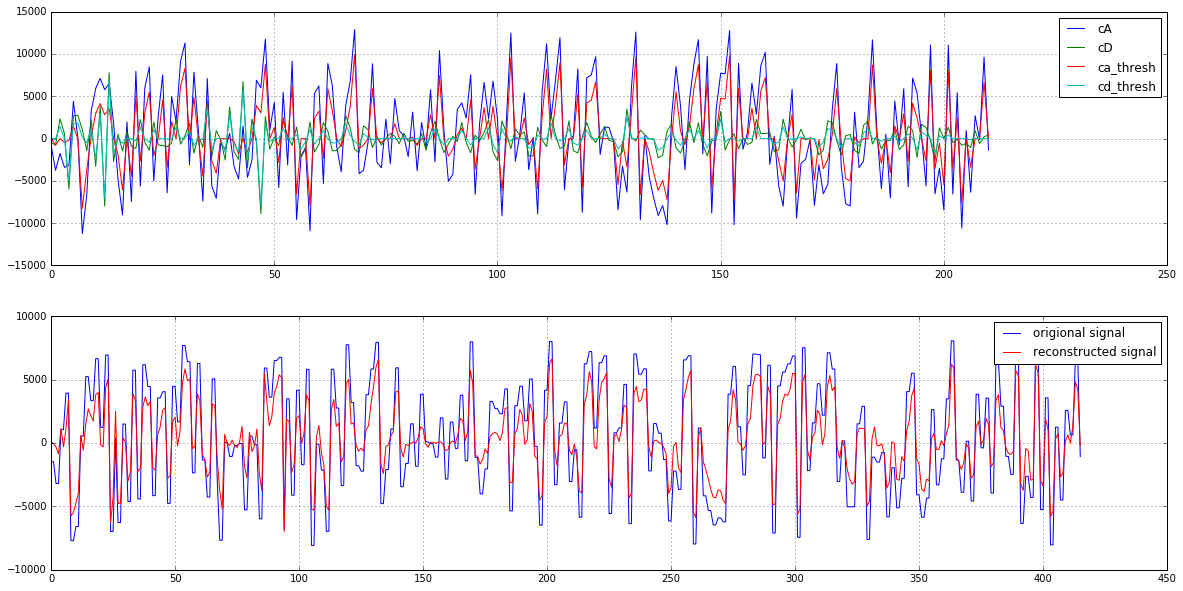

In [4]:
plt.close('all')
for i in range(16):
    plt.subplots(figsize=(20,10))
    
    plt.subplot(211)
    # Origional coefficients        
    plt.plot(cA[i])
    plt.plot(cD[i])
    # Thresholded coefficient
    plt.plot(cat[i])
    plt.plot(cdt[i])
    plt.legend(['cA', 'cD', 'ca_thresh', 'cd_thresh'], loc=0)
    plt.grid('on')
    
    plt.subplot(212)
    plt.plot(x[i])
    plt.hold('on')
    plt.plot(ts_rec[i], 'r')
    plt.legend(['origional signal', 'reconstructed signal'])
    plt.grid('on')
    plt.show()

In [8]:
# one hot ecode the labels
import tensorflow as tf

onehot_ecoded = list()
for value in y:
    label = [0 for _ in range(len(np.unique(y)))]
    label[value] = 1
    onehot_ecoded.append(label)

# convert the list to a matrix
depth = size
y_matr = tf.one_hot(y, size)

/home/tmalete/ROS/lib/python2.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  import sys


TypeError: Print() takes at least 2 arguments (1 given)

In [6]:
from sklearn.cross_validation import train_test_split

signal_df = pd.DataFrame(
    {'Y': ts_rec[0],
    'X': ts_rec[1],
    'F3': ts_rec[2],
    'F4': ts_rec[3],
    'P7': ts_rec[4],
    'FC6': ts_rec[5],
    'F7': ts_rec[6],
    'F8': ts_rec[7],
    'T7': ts_rec[8],
    'P8': ts_rec[9],
    'FC5': ts_rec[10],
    'AF4': ts_rec[11],
    'T8': ts_rec[12],
    '02': ts_rec[13],
    '01': ts_rec[14],
    'AF3': ts_rec[15]})

sig_matr = signal_df.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(sig_matr, onehot_ecoded, test_size=0.25, random_state=0)

print sig_matr

[[  -37.27894063  1718.16326906    91.93178962 ...,  1157.86489744     0.
      0.        ]
 [  -48.99629046  2664.52487789   -59.3243851  ...,  2354.95170877     0.
      0.        ]
 [-3644.91167479 -2983.1292107   -327.31446558 ...,  2902.72606973     0.
      0.        ]
 ..., 
 [-5464.50378134  2859.34034849  4820.87454854 ...,  5119.02563907     0.
      0.        ]
 [-5479.85362962  2698.29179984  4224.83869568 ...,  4370.501786       0.
      0.        ]
 [ 4974.4277184    213.52612967  -192.11290787 ...,  -186.80591345     0.
      0.        ]]


In [7]:


tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 16]) # placeholder for the input layer
W = tf.Variable(tf.zeros([16, 2])) # The wrights of the linear layer
b = tf.Variable(tf.zeros([2])) # bias of the linear layer

init = tf.global_variables_initializer()

# model
Y = tf.nn.softmax(tf.matmul(X, W) + b) # Compute the model predictions

# Placeholder for corrrect answers
Y_ = tf.placeholder(tf.float32, [None, 2])

# loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y)) 

# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 2)) # Is the model's prediction correct?
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # compute teh average accuracy

optimizer = tf.train.GradientDescentOptimizer(0.003) #learning rate
train_step = optimizer.minimize(cross_entropy)

sess = tf.Session() #create a session
sess.run(init) # Initialize the variables


avg_train_cost = 0. 
avg_train_accuracy = 0.
avg_test_cost = 0.
avg_test_accuracy = 0.

num_steps = size   # How many training steps do we want?
for i in range(num_steps):
    # load of batch of images and correct answers
    batch_X = X_train[:i+1]
    batch_Y = y_train[:i+1] # get a batch of signal instances
    train_data = {X:batch_X, Y_:batch_Y} 
    
    # train
    sess.run(train_step, feed_dict=train_data) # Run the training
    
    # sucess ?
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    
    
    if i % 10 == 0:
        print "Step", i, "Current train cost and accuracy: ", c, a
    
    avg_train_cost += c
    avg_train_accuracy += a
    
print("Completed Training")

avg_train_cost /= num_steps
avg_train_accuracy /= num_steps

print("Average train cost: ", avg_train_cost)
print("Average train accuracy: ", avg_train_accuracy)

# How well did we do on the test data?
test_data = {X:X_test, Y_:y_test}
a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print("Test cost: ", c)
print("Test accuracy: ", a)

ValueError: Dimension (2) must be in the range [-2, 2), where 2 is the number of dimensions in the input. for 'ArgMax_1' (op: 'ArgMax') with input shapes: [?,2], [] and with computed input tensors: input[1] = <2>.